In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score

In [33]:
df = pd.read_csv("equipment_anomaly_data.csv")

In [34]:
df.head()

,temperature,pressure,vibration,humidity,equipment,location,faulty
0,58.180180,25.029278,0.606516,45.694907,Turbine,Atlanta,0.0
1,75.740712,22.954018,2.338095,41.867407,Compressor,Chicago,0.0
2,71.358594,27.276830,1.389198,58.954409,Turbine,San Francisco,0.0
3,71.616985,32.242921,1.770690,40.565138,Pump,Atlanta,0.0
4,66.506832,45.197471,0.345398,43.253795,Pump,New York,0.0


In [35]:
df.isnull().sum()

temperature    0
pressure       0
vibration      0
humidity       0
equipment      0
location       0
faulty         0
dtype: int64

In [36]:
df['faulty'] = df['faulty'].astype(int)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7672 entries, 0 to 7671
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  7672 non-null   float64
 1   pressure     7672 non-null   float64
 2   vibration    7672 non-null   float64
 3   humidity     7672 non-null   float64
 4   equipment    7672 non-null   object 
 5   location     7672 non-null   object 
 6   faulty       7672 non-null   int32  
dtypes: float64(4), int32(1), object(2)
memory usage: 389.7+ KB


In [38]:
output_data = []
for col in df.columns:
    if df.loc[:, col].nunique() <= 5:
        unique_values = df.loc[:, col].unique()
        output_data.append([col, df.loc[:, col].nunique(), unique_values, df.loc[:, col].dtype])
    else:
        output_data.append([col, df.loc[:, col].nunique(),"-", df.loc[:, col].dtype])
output_df = pd.DataFrame(output_data, columns=['Column Name', 'Number of Unique Values', ' Unique Values ', 'Data Type'])
(output_df)

,Column Name,Number of Unique Values,Unique Values,Data Type
0,temperature,7672,-,float64
1,pressure,7672,-,float64
2,vibration,7672,-,float64
3,humidity,7672,-,float64
4,equipment,3,"[Turbine, Compressor, Pump]",object
5,location,5,"[Atlanta, Chicago, San Francisco, New York, Ho...",object
6,faulty,2,"[0, 1]",int32


In [39]:
df.describe()

,temperature,pressure,vibration,humidity,faulty
count,7672.000000,7672.000000,7672.000000,7672.000000,7672.000000
mean,70.922478,35.738048,1.611809,50.016574,0.099974
std,16.200059,10.381593,0.728560,11.841479,0.299985
min,10.269385,3.620798,-0.428188,10.215077,0.000000
25%,62.777057,29.485682,1.170906,42.612817,0.000000
50%,70.156900,35.227544,1.533113,50.024744,0.000000
75%,77.568387,41.159913,1.924700,57.340513,0.000000
max,149.690420,79.887734,4.990537,89.984718,1.000000


In [40]:
df['faulty'].value_counts()

faulty
0    6905
1     767
Name: count, dtype: int64

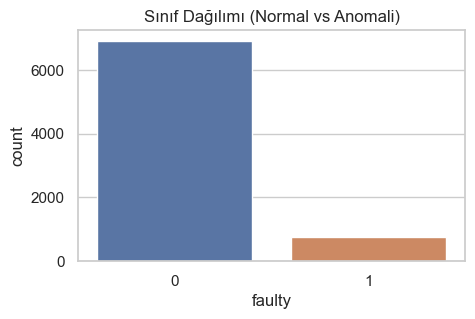

In [41]:
plt.figure(figsize = (5,3))
sns.countplot(x = 'faulty', data = df)
plt.title('Sınıf Dağılımı (Normal vs Anomali)')
plt.show()

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


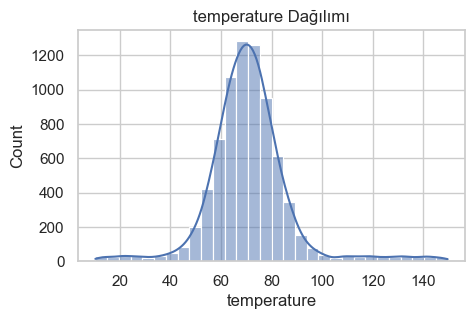

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


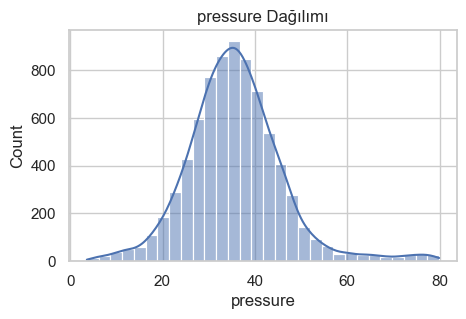

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


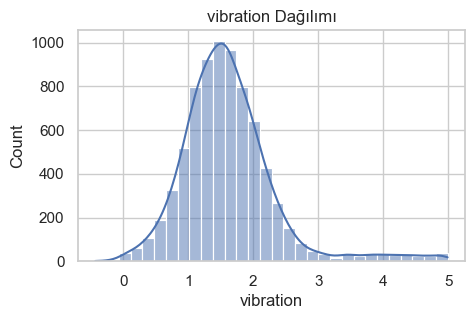

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


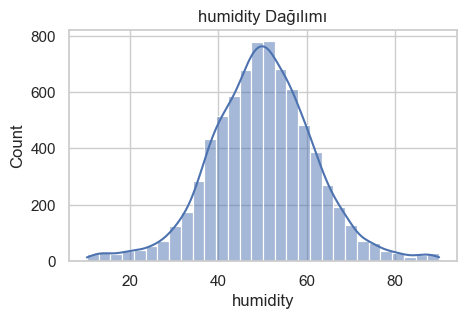

In [42]:
num_cols = ['temperature', 'pressure', 'vibration', 'humidity']
for col in num_cols:
    plt.figure(figsize = (5, 3))
    sns.histplot(df[col], kde = True, bins = 30)
    plt.title(f'{col} Dağılımı')
    plt.show()

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


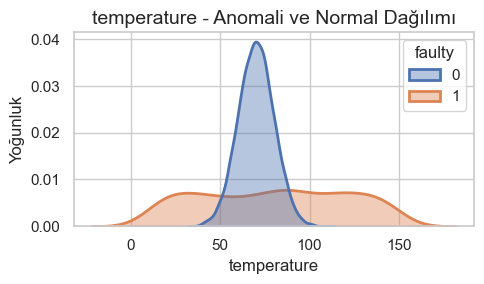

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


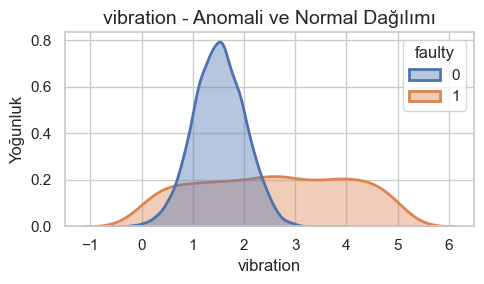

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


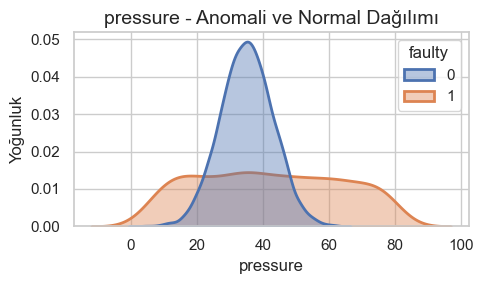

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


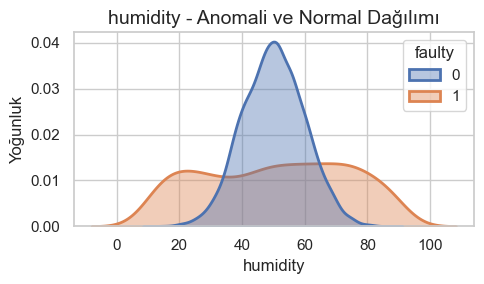

In [43]:
num_cols = ['temperature', 'vibration', 'pressure', 'humidity']

sns.set(style = "whitegrid")

for col in num_cols:
    plt.figure(figsize = (5, 3))
    sns.kdeplot(
        data = df,
        x = col,
        hue = 'faulty',
        fill = True,
        common_norm = False,
        alpha = 0.4,
        linewidth = 2
    )
    plt.title(f'{col} - Anomali ve Normal Dağılımı', fontsize = 14)
    plt.xlabel(col)
    plt.ylabel("Yoğunluk")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


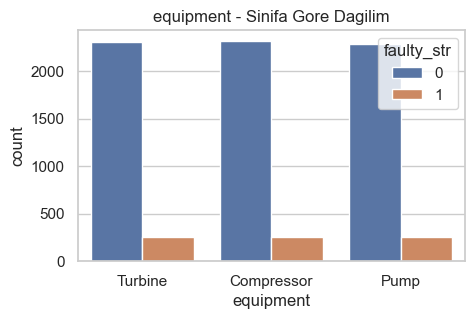

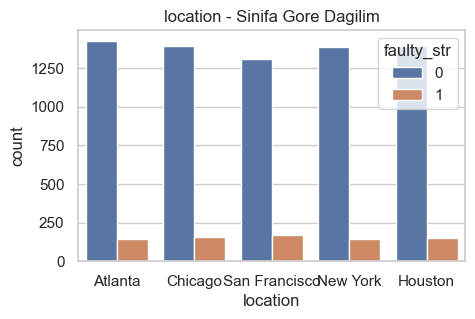

In [44]:
df['faulty_str'] = df['faulty'].astype(str)

for col in ['equipment', 'location']:
    plt.figure(figsize = (5, 3))
    sns.countplot(x = col, hue = 'faulty_str', data = df)
    plt.title(f'{col} - Sinifa Gore Dagilim')
    plt.show()

In [45]:
df['temp_press_ratio'] = df['temperature'] / (df['pressure'] + 1e-3)
df['vib_hum_ratio'] = df['vibration'] / (df['humidity'] + 1e-3)
df['temp_vib_sum'] = df['temperature'] + df['vibration']

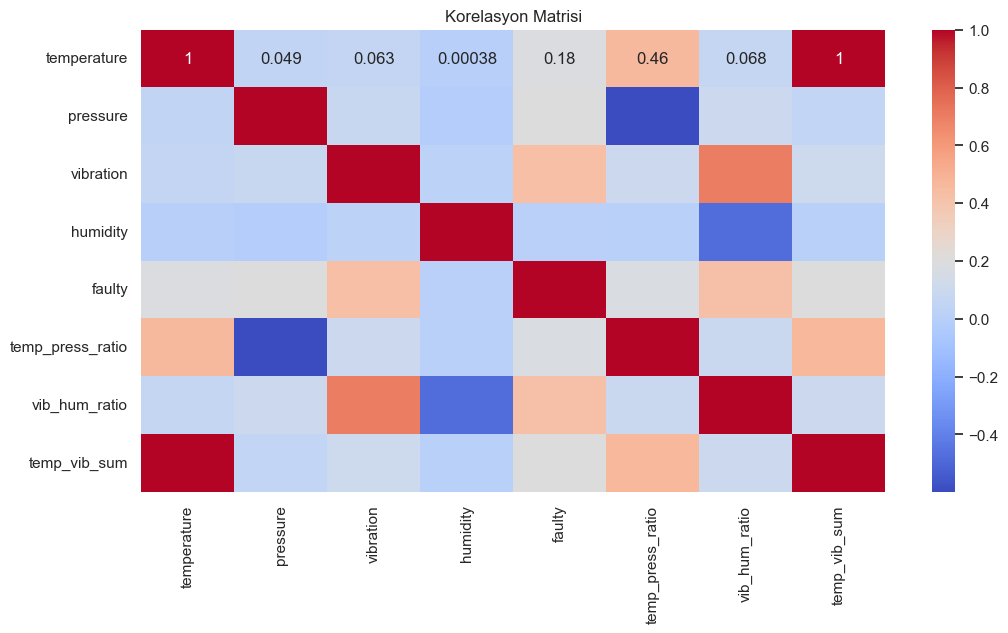

In [46]:
corr_cols = df.select_dtypes(include = [np.number]).columns
plt.figure(figsize = (12, 6))
sns.heatmap(df[corr_cols].corr(), annot = True, cmap = 'coolwarm')
plt.title('Korelasyon Matrisi')
plt.show()

In [47]:
for col in ['equipment', 'location']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [48]:
df.head()

,temperature,pressure,vibration,humidity,equipment,location,faulty,faulty_str,temp_press_ratio,vib_hum_ratio,temp_vib_sum
0,58.180180,25.029278,0.606516,45.694907,2,0,0,0,2.324392,0.013273,58.786696
1,75.740712,22.954018,2.338095,41.867407,0,1,0,0,3.299528,0.055844,78.078807
2,71.358594,27.276830,1.389198,58.954409,2,4,0,0,2.615992,0.023564,72.747793
3,71.616985,32.242921,1.770690,40.565138,1,0,0,0,2.221100,0.043649,73.387675
4,66.506832,45.197471,0.345398,43.253795,1,3,0,0,1.471440,0.007985,66.852230


In [49]:
feature_cols = ['temperature', 'pressure', 'vibration', 'humidity', 'equipment', 'location']
X = df[feature_cols]
y = df['faulty']

In [50]:
y

0       0
1       0
2       0
3       0
4       0
       ..
7667    0
7668    0
7669    0
7670    1
7671    1
Name: faulty, Length: 7672, dtype: int32

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [52]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
for col in num_cols:
    mean = X_train[col].mean()
    std = X_train[col].std()
    X_train[f'{col}_zscore'] = (X_train[col] - mean) / std
    X_test[f'{col}_zscore'] = (X_test[col] - mean) / std

In [54]:
zscore_cols = [f'{col}_zscore' for col in num_cols]
X_train_full = np.hstack([X_scaled, X_train[zscore_cols].values])
X_test_full = np.hstack([X_test_scaled, X_test[zscore_cols].values])

In [55]:
pd.DataFrame(X_test_full)

,0,1,2,3,4,5,6,7,8,9
0,0.446736,0.339606,0.463379,0.708850,1.0,1.00,0.110949,0.632942,-0.599620,1.412358
1,0.393191,0.410698,0.244829,0.571839,0.0,0.50,-0.350570,-0.994250,-0.078628,0.484706
2,0.511824,0.276159,0.273981,0.577690,1.0,0.75,0.671949,-0.777206,-1.064584,0.524317
3,0.385107,0.196295,0.207969,0.581513,1.0,0.75,-0.420246,-1.268686,-1.649860,0.550204
4,0.483352,0.343790,0.278798,0.585995,0.5,0.50,0.426543,-0.741338,-0.568961,0.580550
...,...,...,...,...,...,...,...,...,...,...
1530,0.457813,0.330800,0.390733,0.672760,0.0,0.50,0.206423,0.092060,-0.664156,1.168006
1531,0.441639,0.510079,0.502907,0.467238,0.0,0.25,0.067010,0.927245,0.649671,-0.223514
1532,0.381810,0.517080,0.245891,0.469584,0.5,0.00,-0.448664,-0.986342,0.700981,-0.207636
1533,0.330470,0.458648,0.338455,0.413203,0.0,0.50,-0.891174,-0.297166,0.272762,-0.589368


In [56]:
""" # Recall Degerini Arttirmak Icın
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_full, y_train) """

# SMOTETomek/SMOTEENN Uygulaması
from imblearn.combine import SMOTEENN  # Alternatif olarak SMOTETomek de kullanılabilir.
smoteenn = SMOTEENN(random_state = 42)
X_train_resampled, y_train_resampled = smoteenn.fit_resample(X_train, y_train)

""" Daha önce X_train_smote, y_train_smote kullandığın tüm yerlerde artık X_train_resampled, y_train_resampled kullanmalısın. """



' Daha önce X_train_smote, y_train_smote kullandığın tüm yerlerde artık X_train_resampled, y_train_resampled kullanmalısın. '

In [ ]:
# Hiperparametre Optimizasyonu
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Hiperparametre Dağılımları
param_dist = {
    'n_estimators': randint(100, 300), # Ağaç sayısı ne kadar fazla olursa o kadar genelleme sağlanır, ama eğitim süresi uzar. 
    'max_depth': [None, 10, 20, 30], # Derinlik arttıkça model ezberlemeye yatın hale gelir. Bu yüzden sınırlı tutuyoruz.
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4], # Yaprakta en az kaç örnek olmalı? Çok küçük değerler ezberlemeye yol açar.
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Random Forest Modeli: SMOTE uygulandıktan sonraki veriyi kullanacak.
rf = RandomForestClassifier(class_weight = 'balanced', random_state = 42)

# RandomizedSearchCV Nesnesi
random_search = RandomizedSearchCV(
    estimator = rf,
    param_distributions = param_dist,
    n_iter = 50,
    cv = 3,
    scoring = 'f1',
    verbose = 2,
    random_state = 42,
    n_jobs = -1
)

# Optimizasyonlu Eğitim
random_search.fit(X_train_resampled, y_train_resampled)

# En İyi Modeli Al
best_rf = random_search.best_estimator_

# Test Verisi Üzerinde Olasılık Tahmini
y_proba_best = best_rf.predict_proba(X_test_full)[:, 1]

# Threshold Belirleme (Ornek: 0.52)
threshold = 0.52
y_pred_best_thresh = (y_proba_best >= threshold).astype(int)

# Performans Değerlendirmesi
from sklearn.metrics import classification_report, confusion_matrix

print("--- Best RF + Threshold (0.52) Classification Report:")
print(classification_report(y_test, y_pred_best_thresh))

print("--- Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_thresh))


Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [ ]:
# Yeni Sınıf Dağılımını İncele: SMOTEENN uyguladıktan sonra ne kadar veri düşüşü olmuş. (Temiz olmayan veriler silinir.)
from collections import Counter
print("Yeni Eğitim Verisi Sınıf Dağılımı:", Counter(y_train_resampled))


Yeni Eğitim Verisi Sınıf Dağılımı: Counter({1: 5352, 0: 5093})


In [ ]:
""" # Tahmin ve Degerlendirme
y_pred_smote = rf_smote.predict(X_test_full)

# Performans Değerlendirmesi
from sklearn.metrics import classification_report, confusion_matrix

print("Random Forest with SMOTE - Classification Report:")
print(classification_report(y_test, y_pred_smote))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_smote))"""


' # Tahmin ve Degerlendirme\ny_pred_smote = rf_smote.predict(X_test_full)\n\n# Performans Değerlendirmesi\nfrom sklearn.metrics import classification_report, confusion_matrix\n\nprint("Random Forest with SMOTE - Classification Report:")\nprint(classification_report(y_test, y_pred_smote))\n\nprint("Confusion Matrix:")\nprint(confusion_matrix(y_test, y_pred_smote))'

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


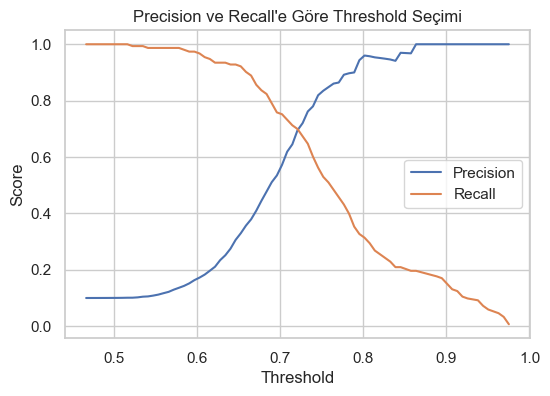

In [ ]:
from sklearn.metrics import precision_recall_curve

# ROC ve PR Curve İçin Tahmin Olasılıkları
y_proba = best_rf.predict_proba(X_test_full)[:, 1]

# Precision - Recall Eğrisi
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(thresholds, precisions[:-1], label = 'Precision')
plt.plot(thresholds, recalls[:-1], label = 'Recall')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision ve Recall'e Göre Threshold Seçimi")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Threshold Secimi
new_threshold = 0.52 # Grafik analizinin sonucundan elde edilir.
y_pred_thresh = (y_proba >= new_threshold).astype(int)

print("Threshold Ayarlanmış Classification Report:\n", classification_report(y_test, y_pred_thresh))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_thresh))

Threshold Ayarlanmış Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.02      0.04      1382
           1       0.10      0.99      0.18       153

    accuracy                           0.12      1535
   macro avg       0.53      0.51      0.11      1535
weighted avg       0.88      0.12      0.05      1535

Confusion Matrix:
 [[  25 1357]
 [   1  152]]


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


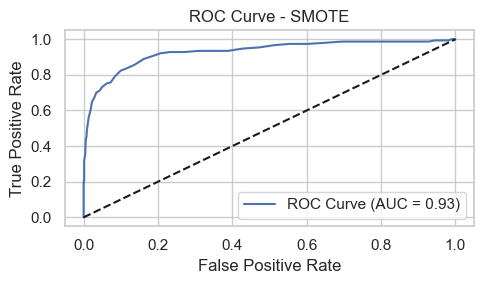

In [ ]:
# ROC Egrisi
from sklearn.metrics import roc_curve, auc

y_proba_smote = best_rf.predict_proba(X_test_full)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba_smote)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (5, 3))
plt.plot(fpr, tpr, label = f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SMOTE")
plt.legend(loc = "lower right")
plt.grid(True)
plt.tight_layout()
plt.show()
